In [62]:
import numpy as np
import matplotlib.pyplot as plt
import dunestyle.matplotlib as dunestyle
import time

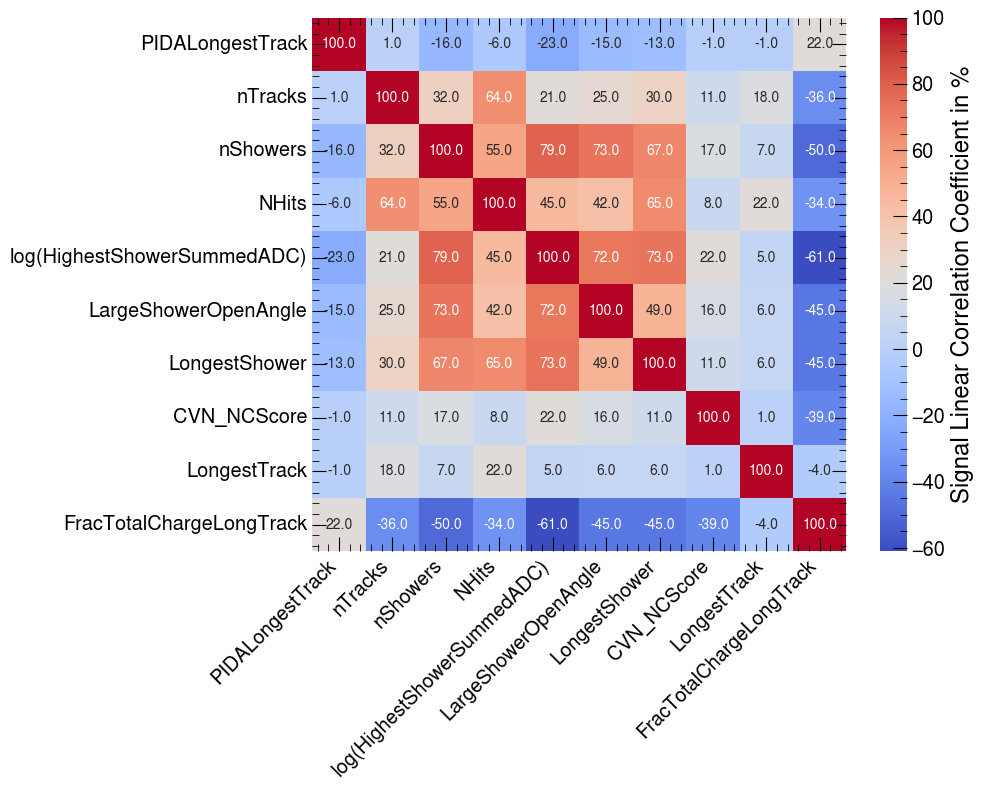

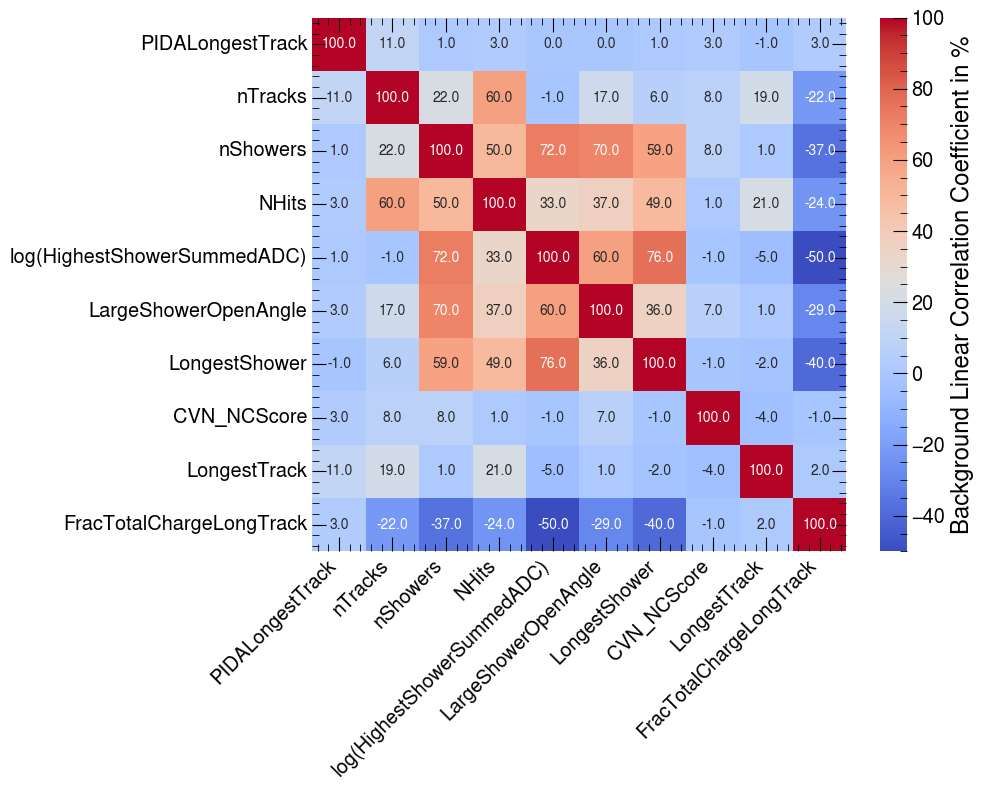

In [101]:
import seaborn as sns

# Define the variables names from the files
variables = [
    "PIDALongestTrack", "nTracks", "nShowers", "NHits",
    "log(HighestShowerSummedADC)", "LargeShowerOpenAngle",
    "LongestShower", "CVN_NCScore", "LongestTrack", "FracTotalChargeLongTrack"
]

# Extracted correlation matrices from the provided macros
correlation_matrix_background = np.array([
    [100,  11,   1,   3,   0,   0,  1,   3,  -1, 3],
    [ 11, 100,  22,  60,  -1,  17,   6,   8,  19, -22],
    [  1,  22, 100,  50,  72,  70,  59,   8,   1, -37],
    [  3,  60,  50, 100,  33,  37,  49,   1,  21, -24],
    [  1,  -1,  72,  33, 100,  60,  76,  -1,  -5, -50],
    [  3,  17,  70,  37,  60, 100,  36,   7,   1, -29],
    [ -1,   6,  59,  49,  76,  36, 100,  -1,  -2, -40],
    [  3,   8,   8,   1,  -1,   7,  -1, 100,  -4,  -1],
    [ 11,  19,   1,  21,  -5,   1,  -2,  -4, 100,   2],
    [ 3, -22, -37, -24, -50, -29, -40,  -1,   2, 100]
])

correlation_matrix_signal = np.array([
    [100,   1, -16,  -6, -23, -15, -13,  -1,  -1,  22],
    [  1, 100,  32,  64,  21,  25,  30,  11,  18, -36],
    [-16,  32, 100,  55,  79,  73,  67,  17,   7, -50],
    [ -6,  64,  55, 100,  45,  42,  65,   8,  22, -34],
    [-23,  21,  79,  45, 100,  72,  73,  22,   5, -61],
    [-15,  25,  73,  42,  72, 100,  49,  16,   6, -45],
    [-13,  30,  67,  65,  73,  49, 100,  11,   6, -45],
    [ -1,  11,  17,   8,  22,  16,  11, 100,   1, -39],
    [ -1,  18,   7,  22,   5,   6,   6,   1, 100,  -4],
    [ 22, -36, -50, -34, -61, -45, -45, -39,  -4, 100]
])

# Plotting function
def plot_correlation_matrix(corr_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", xticklabels=variables, yticklabels=variables,  cbar_kws={'label': title+' Linear Correlation Coefficient in %'})
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    #plt.legend()
    #plt.title(title)
    plt.tight_layout()
    plt.savefig('bdt_corrMatrix_'+title+'_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
    plt.show()

# Plot both matrices
plot_correlation_matrix(correlation_matrix_signal, "Signal")
plot_correlation_matrix(correlation_matrix_background, "Background")

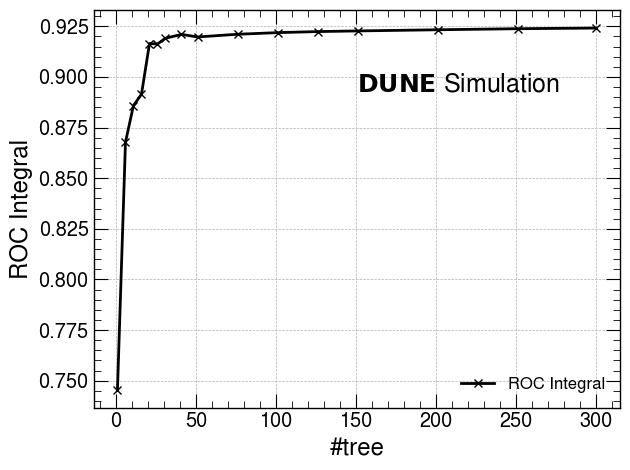

In [66]:
# Data extracted from ROOT script

# Data extracted from the first figure in the ROOT macro
x_roc = [1, 6, 11, 16, 21, 26, 31, 41, 51, 76, 101, 126, 151, 201, 251, 300]
y_roc = [0.7456531, 0.8678172, 0.8858954, 0.8914432, 0.9164831, 0.9162813, 0.9191244, 
                          0.9209974, 0.9197373, 0.9210758, 0.9218799, 0.9223929, 0.9227219, 0.923292, 
                          0.923819, 0.9241294]

# Create figure with three subplots

plt.figure()
# Plot 1: ROC Integral vs. Number of Trees
plt.plot(x_roc, y_roc, marker='x', linestyle='-', label="ROC Integral")
plt.xlabel("#tree")
plt.ylabel('ROC Integral')
dunestyle.Simulation(0.5,0.795)
#axes[0].set_title("ROC Integral vs. Number of Trees")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('bdt_rocint_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

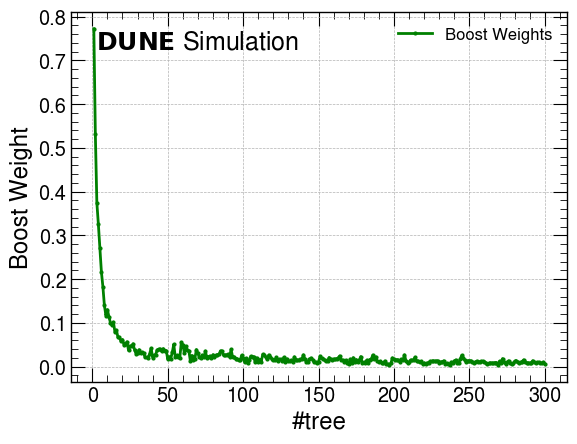

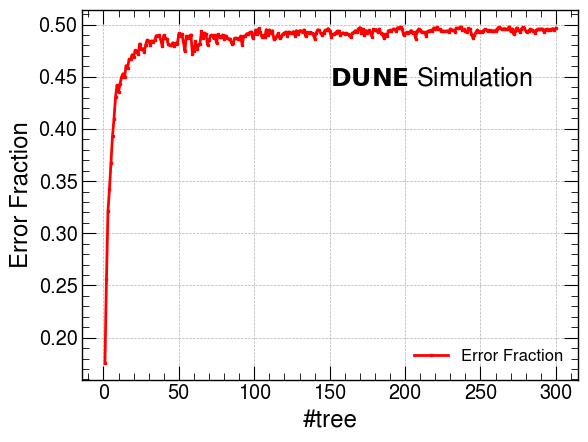

In [64]:
# Open the ROOT file (if available) or macro-generated data
file_path = "cv_BDTAtmCCNC_202503120817.C"

# Initialize lists
boost_weights = []
error_fractions = []

# Read the file and extract values
with open(file_path, "r") as file:
    for line in file:
        if "BoostWeightVsTree__43->SetBinContent" in line:
            value = float(line.split(",")[-1].strip("); \n"))
            boost_weights.append(value)
        if "ErrFractHist__44->SetBinContent" in line:
            value = float(line.split(",")[-1].strip("); \n"))
            error_fractions.append(value)

# Convert to NumPy arrays
boost_weights_x = np.arange(1, len(boost_weights) + 1)
error_fractions_x = np.arange(1, len(error_fractions) + 1)

# Plot Boost Weights vs. Tree
plt.figure()
plt.plot(boost_weights_x, boost_weights, marker='o', linestyle='-', color='g', markersize=2, label="Boost Weights")
plt.xlabel("#tree")
plt.ylabel("Boost Weight")
#plt.title("Boost Weights vs. Tree (Extracted Data)")
plt.grid(True)
dunestyle.Simulation()
plt.legend()
plt.savefig('bdt_boost_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

# Plot Error Fraction vs. Tree Number
plt.figure()
plt.plot(error_fractions_x, error_fractions, marker='s', linestyle='-', color='r', markersize=2, label="Error Fraction")
plt.xlabel("#tree")
plt.ylabel("Error Fraction")
#plt.title("Error Fraction vs. Tree Number (Extracted Data)")
plt.grid(True)
dunestyle.Simulation(0.5,0.795)
plt.legend()
plt.savefig('bdt_error_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

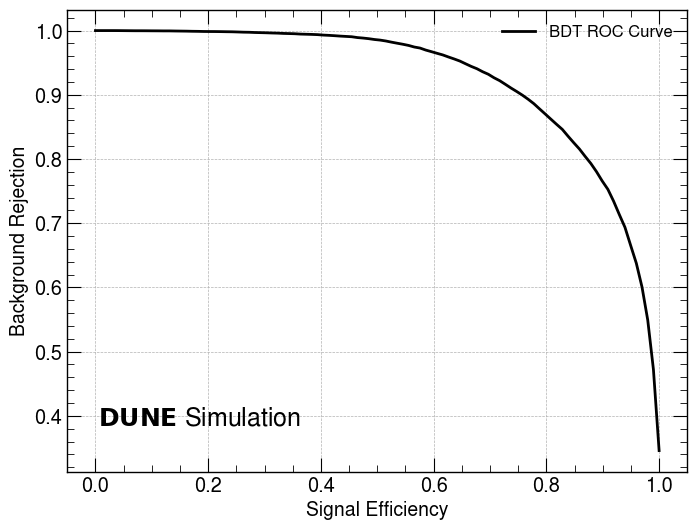

In [67]:
# Extracted data from the ROOT macro for plotting
signal_efficiency = np.linspace(0, 1, 100)  # 100 bins between 0 and 1

background_rejection = [
    1, 1, 1, 1, 0.9999613, 0.9998839, 0.9998066, 0.9997292, 0.9997292, 0.9996905, 
    0.9996132, 0.9995745, 0.9994971, 0.9994971, 0.9993424, 0.9992263, 0.9991103, 0.9989168, 0.9988008, 0.9986074, 
    0.99853, 0.9984913, 0.9983752, 0.9982205, 0.9981044, 0.9978337, 0.9975242, 0.9973745, 0.9970097, 0.9967892, 
    0.9965571, 0.9962476, 0.9960155, 0.9955899, 0.9953578, 0.995087, 0.9945455, 0.9942964, 0.9940339, 0.9936944, 
    0.9929981, 0.9925725, 0.9920309, 0.9914006, 0.9909091, 0.9904062, 0.9891296, 0.9883559, 0.9873888, 0.9861122, 
    0.9851838, 0.9837911, 0.9819787, 0.9803099, 0.9786847, 0.9768665, 0.9743983, 0.9728046, 0.9696838, 0.9671783, 
    0.9646046, 0.962089, 0.9588733, 0.9558183, 0.9525452, 0.9483403, 0.944207, 0.9406098, 0.9359242, 0.93199, 
    0.9265392, 0.9219631, 0.9162656, 0.9104489, 0.9050317, 0.8993397, 0.8930337, 0.8861509, 0.8780215, 0.8700379, 
    0.861952, 0.8539159, 0.8461103, 0.8355605, 0.825403, 0.8156002, 0.8041524, 0.7931335, 0.7802534, 0.7658266, 
    0.7527783, 0.7344081, 0.7136925, 0.6936418, 0.6654681, 0.6375679, 0.6004244, 0.5493153, 0.4723124, 0.3458689
]

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(signal_efficiency, background_rejection, linewidth=2, label="BDT ROC Curve")

# Labels and title
plt.xlabel("Signal Efficiency", fontsize=14)
plt.ylabel("Background Rejection", fontsize=14)
#plt.title("Background Rejection vs. Signal Efficiency", fontsize=16)
plt.legend()
dunestyle.Simulation(0.05,0.1)
plt.grid(True)
plt.savefig('bdt_roc_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
# Show the plot
plt.show()

0 PIDALongestTrack
1 nTracks
2 nShowers
3 NHits
4 log(HighestShowerSummedADC)
5 LargeShowerOpenAngle
6 LongestShower
7 CVN_NCScore
8 LongestTrack
9 FracTotalChargeLongTrack


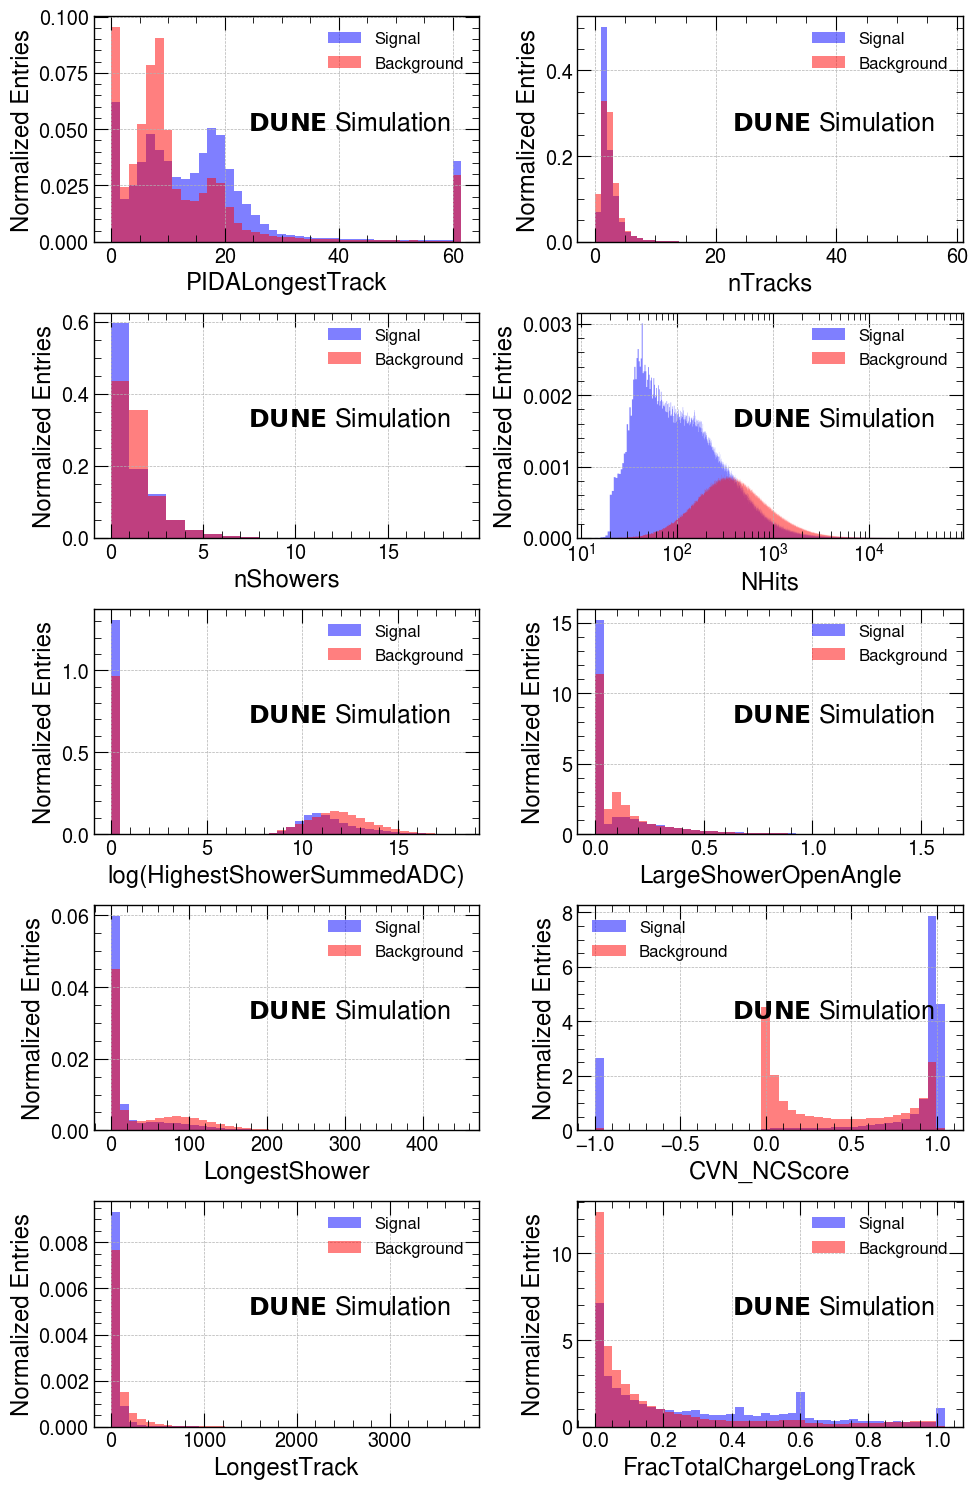

In [99]:
import re

# Function to extract histograms from ROOT macro files
def extract_histogram_data(file_path):
    """
    Extracts histogram data for signal and background from a ROOT macro file.

    Parameters:
    - file_path: Path to the ROOT macro file.

    Returns:
    - A dictionary containing histogram data for each variable.
    """
    histograms = {}
    current_hist = None

    # Regex patterns for histogram definitions and bin content
    hist_pattern = re.compile(r'TH1F\s*\*\s*([\w_]+)\s*=\s*new\s*TH1F\("([\w_]+)","([^"]+)",(\d+),([\d.eE+-]+),([\d.eE+-]+)\)')
    bin_content_pattern = re.compile(r'SetBinContent\((\d+),([\d.eE+-]+)\)')

    with open(file_path, "r") as file:
        for line in file:
            # Check for histogram declaration
            hist_match = hist_pattern.search(line)
            if hist_match:
                hist_name = hist_match.group(1)
                variable_name = hist_match.group(3).replace("Input variable: ", "").strip()
                num_bins = int(hist_match.group(4))
                x_min = float(hist_match.group(5))
                x_max = float(hist_match.group(6))

                histograms[hist_name] = {
                    "variable": variable_name,
                    "num_bins": num_bins,
                    "x_min": x_min,
                    "x_max": x_max,
                    "bin_contents": np.zeros(num_bins),
                }
                current_hist = hist_name

            # Check for bin content assignments
            if current_hist:
                bin_match = bin_content_pattern.search(line)
                if bin_match:
                    bin_index = int(bin_match.group(1)) - 1  # Convert ROOT 1-based to Python 0-based index
                    value = float(bin_match.group(2))

                    if 0 <= bin_index < histograms[current_hist]["num_bins"]:
                        histograms[current_hist]["bin_contents"][bin_index] = value

    return histograms

# Plot histograms in a 5x2 grid, now correctly including both training and testing variables
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
axes = axes.flatten()
i=0
# Extract histograms from the correct file
files_path = ["inputvariables1.C","inputvariables2.C"]

for file in files_path:
    hist_data = extract_histogram_data(file)

    
    # Organizing histograms based on variable names and categories (Signal/Background)
    variable_histograms = {}

    for hist_name, hist_data_entry in hist_data.items():
        variable = hist_data_entry["variable"]

        if variable not in variable_histograms:
            variable_histograms[variable] = {"Signal": None, "Background": None}

        # Assign histograms based on their name structure
        if "Signal" in hist_name:
            variable_histograms[variable]["Signal"] = hist_data_entry
        elif "Background" in hist_name:
            variable_histograms[variable]["Background"] = hist_data_entry

    # Plot histograms for each variable
    for variable, hist_dict in variable_histograms.items():
        ax = axes[i]
        signal_hist = hist_dict["Signal"]
        background_hist = hist_dict["Background"]
        print(i, variable)
        # Define bins based on the available histograms
        if signal_hist:
            bins = np.linspace(signal_hist["x_min"], signal_hist["x_max"], signal_hist["num_bins"] + 1)
        elif background_hist:
            bins = np.linspace(background_hist["x_min"], background_hist["x_max"], background_hist["num_bins"] + 1)
        else:
            continue  # Skip if no valid histogram exists

        # Plot histograms
        if signal_hist:
            ax.hist(bins[:-1], bins, weights=signal_hist["bin_contents"], alpha=0.5, label="Signal", color="b", histtype='stepfilled')
        if background_hist:
            ax.hist(bins[:-1], bins, weights=background_hist["bin_contents"], alpha=0.5, label="Background", color="r", histtype='stepfilled')
        
        
        ax.set_xlabel(variable)
        ax.set_ylabel("Normalized Entries")
        #ax.set_title(variable)
        if variable == 'NHits':
            ax.set_xscale('log')
        dunestyle.Simulation(0.4,0.5,ax=ax)
        ax.grid(True)
        ax.legend()
        i+=1 

plt.tight_layout()
plt.savefig('bdt_inputs_'+str(time.strftime("%Y%m%d"))+'.pdf', format='pdf')
plt.show()

